In [197]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
#import sklearn.mixture.GaussianMixture 
from sklearn.mixture import GaussianMixture 

In [207]:
#把食物变dummy
mk = pd.read_csv('transactions_n100000.csv',parse_dates=['order_timestamp'])
mk = mk.rename(columns={'order_timestamp':'Date'})
just_dummies = pd.get_dummies(mk['item_name'])
mk = pd.concat([mk, just_dummies], axis=1)      
mk.drop(['item_name'], inplace=True, axis=1)
mk["ticket_id"] = pd.factorize(mk["ticket_id"])[0]
mk.head()

,ticket_id,Date,location,item_count,lat,long,burger,fries,salad,shake
0,0,2019-02-28 18:33:00,4,2,41.889047,-87.803605,0,0,0,1
1,0,2019-02-28 18:33:00,4,2,41.889047,-87.803605,1,0,0,0
2,0,2019-02-28 18:33:00,4,2,41.889047,-87.803605,0,1,0,0
3,1,2019-09-18 11:59:00,5,1,41.881818,-87.640234,1,0,0,0
4,1,2019-09-18 11:59:00,5,2,41.881818,-87.640234,0,0,1,0


In [208]:
#把一个订单合并起来，会有很多重复值
mk['burger']=mk['burger']*mk['item_count']
mk['fries']=mk['fries']*mk['item_count']
mk['salad']=mk['salad']*mk['item_count']
mk['shake']=mk['shake']*mk['item_count']
mk.head()

,ticket_id,Date,location,item_count,lat,long,burger,fries,salad,shake
0,0,2019-02-28 18:33:00,4,2,41.889047,-87.803605,0,0,0,2
1,0,2019-02-28 18:33:00,4,2,41.889047,-87.803605,2,0,0,0
2,0,2019-02-28 18:33:00,4,2,41.889047,-87.803605,0,2,0,0
3,1,2019-09-18 11:59:00,5,1,41.881818,-87.640234,1,0,0,0
4,1,2019-09-18 11:59:00,5,2,41.881818,-87.640234,0,0,2,0


In [210]:
#去重
mk1 = mk[['ticket_id','Date','location','lat','long']]
mk1=mk1.drop_duplicates()
mk2 = mk[['ticket_id','burger','fries','salad','shake']]
mk2 = mk2.groupby(['ticket_id']).sum()
mkAll = pd.merge(mk1, mk2, how='left', on=['ticket_id'])
just_dummies = pd.get_dummies(mkAll['location'])
mkAll = pd.concat([mkAll, just_dummies], axis=1)      
mkAll.drop(['location'], inplace=True, axis=1)
mkAll.drop([1], inplace=True, axis=1)
mkAll.drop(['lat','long'], inplace=True, axis=1)
mkAll
mkAll_o=pd.DataFrame(mkAll)

In [201]:
mkAll['burger'] = (mkAll['burger']-mkAll['burger'].mean())/(mkAll['burger'].std())
mkAll['fries'] = (mkAll['fries']-mkAll['fries'].mean())/(mkAll['fries'].std())
mkAll['salad'] = (mkAll['salad']-mkAll['salad'].mean())/(mkAll['salad'].std())
mkAll['shake'] = (mkAll['shake']-mkAll['shake'].mean())/(mkAll['shake'].std())
mkAll

,ticket_id,Date,burger,fries,salad,shake,2,3,4,5,6,7,8,9
0,0,2019-02-28 18:33:00,0.089097,-0.426829,-0.654778,0.466107,0,0,1,0,0,0,0,0
1,1,2019-09-18 11:59:00,-0.540388,0.323745,1.189121,-0.762901,0,0,0,1,0,0,0,0
2,2,2019-09-21 12:40:00,-1.169872,0.323745,2.111070,-0.762901,0,1,0,0,0,0,0,0
3,3,2019-09-21 12:25:00,-1.169872,1.074318,3.033020,-0.762901,0,0,1,0,0,0,0,0
4,4,2019-09-05 17:21:00,1.977552,1.824892,-0.654778,2.309619,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2019-10-27 01:17:00,0.089097,-0.426829,-0.654778,-0.762901,0,0,0,0,1,0,0,0
99996,99996,2019-10-05 23:59:00,-0.540388,-1.177402,-0.654778,-0.762901,0,0,0,0,1,0,0,0
99997,99997,2019-10-12 16:29:00,1.348067,1.074318,-0.654778,1.695115,0,0,0,0,0,0,1,0
99998,99998,2019-05-27 17:06:00,0.718582,1.074318,0.267172,1.080611,0,0,0,0,0,0,0,1


In [202]:
#time0:1:14    time1:14:16     time2:16:20      time3:20:24

k=[]
m=[]
for i in mkAll['Date']:
    k.append(i.hour)    
for i in k:
    if (0<=i)&(i<=14):
        m.append('time0')
    if (14<i)&(i<=16):
        m.append('time1')
    if (16<i)&(i<=20):
        m.append('time2')
    if ((20<i)&(i<=24)):
        m.append('time3')
mkAll['Hour']=m
just_dummies = pd.get_dummies(mkAll['Hour'])
mkAll = pd.concat([mkAll, just_dummies], axis=1)      
mkAll.drop(['Hour'], inplace=True, axis=1)
mkAll.drop(['time0'], inplace=True, axis=1)
mkAll.drop(['Date'], inplace=True, axis=1)
mkAll = mkAll.set_index(keys=['ticket_id'])
mkAll


,burger,fries,salad,shake,2,3,4,5,6,7,8,9,time1,time2,time3
ticket_id,,,,,,,,,,,,,,,
0,0.089097,-0.426829,-0.654778,0.466107,0,0,1,0,0,0,0,0,0,1,0
1,-0.540388,0.323745,1.189121,-0.762901,0,0,0,1,0,0,0,0,0,0,0
2,-1.169872,0.323745,2.111070,-0.762901,0,1,0,0,0,0,0,0,0,0,0
3,-1.169872,1.074318,3.033020,-0.762901,0,0,1,0,0,0,0,0,0,0,0
4,1.977552,1.824892,-0.654778,2.309619,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.089097,-0.426829,-0.654778,-0.762901,0,0,0,0,1,0,0,0,0,0,0
99996,-0.540388,-1.177402,-0.654778,-0.762901,0,0,0,0,1,0,0,0,0,0,1
99997,1.348067,1.074318,-0.654778,1.695115,0,0,0,0,0,0,1,0,1,0,0


In [183]:
# criterion: inertia (越小越好)
inertias = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=2020)
    kmeans.fit(mkAll)  # here we do not use fit_transform since we don't need the transformed result
    inertias[k] = kmeans.inertia_
print(inertias) 

{1: 510117.5875100645, 2: 275899.04968066467, 3: 186489.84410275266, 4: 166400.4661811677, 5: 149361.57635032843, 6: 138764.993974527, 7: 125822.18741702072, 8: 118806.38873086561, 9: 113519.9542778036, 10: 108281.3244848578, 11: 103994.7199835763, 12: 99210.55009539242, 13: 95885.64518557198, 14: 93473.5860726459, 15: 89725.0638400007, 16: 87285.28016159436, 17: 83859.28698491355, 18: 81779.10461940327, 19: 79228.3998788436}


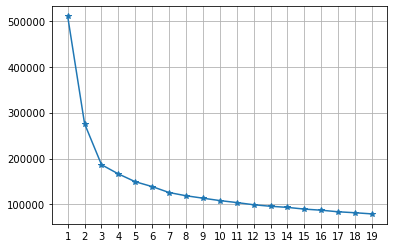

In [184]:
ax = plt.subplot()
k=list(inertias.keys())
v=list(inertias.values())
ax.plot(k,v, '-*')
ax.set_xticks(np.arange(1, 20))
ax.grid()
plt.show()

In [188]:
gmmModel = GaussianMixture(n_components=3, covariance_type='diag', random_state=0)
gmmModel.fit(mkAll)
labels = gmmModel.predict(mkAll)
print(labels)

'''
for i in range(1,len(labels)):
    if labels[i] == 0:
        plt.scatter(mkAll[i, 0], mkAll[i, 1], s=15, c='red')
    elif labels[i] == 1:
        plt.scatter(mkAll[i, 0], mkAll[i, 1], s=15, c='blue')
    elif labels[i] == 2:
        plt.scatter(mkAll[i, 0], mkAll[i, 1], s=15, c='green')
plt.title('Gaussian Mixture Model')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print(gmmModel.means_)
print(gmmModel.covariances_)
'''

[1 0 0 ... 1 1 2]


"\nfor i in range(1,len(labels)):\n    if labels[i] == 0:\n        plt.scatter(mkAll[i, 0], mkAll[i, 1], s=15, c='red')\n    elif labels[i] == 1:\n        plt.scatter(mkAll[i, 0], mkAll[i, 1], s=15, c='blue')\n    elif labels[i] == 2:\n        plt.scatter(mkAll[i, 0], mkAll[i, 1], s=15, c='green')\nplt.title('Gaussian Mixture Model')\nplt.xlabel('x')\nplt.ylabel('y')\nplt.show()\nprint(gmmModel.means_)\nprint(gmmModel.covariances_)\n"

In [211]:
labels=pd.DataFrame(labels)
mkAll_o['Cluster']=labels
mkAll_o

,ticket_id,Date,burger,fries,salad,shake,2,3,4,5,6,7,8,9,Cluster
0,0,2019-02-28 18:33:00,2,2,0,2,0,0,1,0,0,0,0,0,1
1,1,2019-09-18 11:59:00,1,3,2,0,0,0,0,1,0,0,0,0,0
2,2,2019-09-21 12:40:00,0,3,3,0,0,1,0,0,0,0,0,0,0
3,3,2019-09-21 12:25:00,0,4,4,0,0,0,1,0,0,0,0,0,0
4,4,2019-09-05 17:21:00,5,5,0,5,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2019-10-27 01:17:00,2,2,0,0,0,0,0,0,1,0,0,0,2
99996,99996,2019-10-05 23:59:00,1,1,0,0,0,0,0,0,1,0,0,0,2
99997,99997,2019-10-12 16:29:00,4,4,0,4,0,0,0,0,0,0,1,0,1
99998,99998,2019-05-27 17:06:00,3,4,1,3,0,0,0,0,0,0,0,1,1


In [212]:
mkAll.to_csv('mkAll_o.csv')